In [42]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# import mglearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import eli5

C:\Users\cbccc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\cbccc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
df=pd.read_csv('full.csv')

In [10]:
df.head()

,Unnamed: 0,Patient ID,AgeCode,SexCode,Mortality (1= death),Age_18_39,Age_40_49,Age_50_59,Age_60_69,Age_70_74,...,UROLG_GEN_Kidney,UROLG_GEN_Other_Nos_A,UROLG_GEN_Other_Nos_B,UROLG_GEN_Pers_Fam_Hx_Ds,UROLG_GEN_Screening,UROLG_GEN_Service,UROLG_GEN_Sgn_Symp,UROLG_GEN_Status_A,UROLG_GEN_Status_B,UROLG_GEN_Status2
0,1,1.0,13,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,2.0,11,2.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3.0,12,2.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4.0,10,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5.0,13,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


(array([349363.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  21270.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

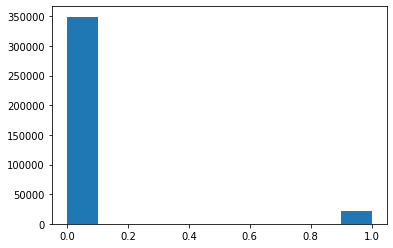

In [15]:
# this plot shows how unbalanced the data set is
plt.hist(df['Mortality (1= death)'])

In [18]:
# generate special classes for types
count0, count1 =df['Mortality (1= death)'].value_counts()
aclass0 = df[df['Mortality (1= death)']==0]
aclass1 = df[df['Mortality (1= death)']==1]
print(count0)
print(count1)

349363
21270


349363


(array([349363.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 349363.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

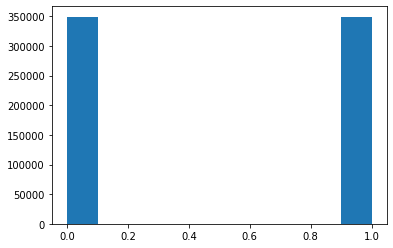

In [20]:
# over sampling for class 1
# Generate a new sample of count0 items of count1
over1 = aclass1.sample(count0,replace=True)
df1 = pd.concat([aclass0,over1],axis=0)
print(len(over1))
plt.hist(df1['Mortality (1= death)'])

In [24]:
# set up data, and check if balanced
y = df1['Mortality (1= death)']
X = df1.iloc[:,5:242]
print(np.mean(y))
X.head()
# Note that the data set is now perfectly balanced

0.5


,Age_18_39,Age_40_49,Age_50_59,Age_60_69,Age_70_74,Age_75_99,Gender_Male,BEHAV_AdjustmentStress,BEHAV_Affective_A,BEHAV_Affective_B,...,UROLG_GEN_Kidney,UROLG_GEN_Other_Nos_A,UROLG_GEN_Other_Nos_B,UROLG_GEN_Pers_Fam_Hx_Ds,UROLG_GEN_Screening,UROLG_GEN_Service,UROLG_GEN_Sgn_Symp,UROLG_GEN_Status_A,UROLG_GEN_Status_B,UROLG_GEN_Status2
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
train_data=df1.drop(['Unnamed: 0','Patient ID','AgeCode','SexCode'],axis=1)
X = train_data.drop('Mortality (1= death)', axis=1)
y = train_data['Mortality (1= death)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).drop(['Mortality (1= death)'], axis=1).columns
categorical_features = train_data.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  LogisticRegression(class_weight='balanced', random_state=0))])
    
model = pipe.fit(X_train, y_train)

In [83]:
from sklearn.metrics import confusion_matrix
target_names = y_test.unique().astype(str)
y_pred = model.predict(X_test)
cmat = confusion_matrix(y_test,y_pred)
print(cmat)
tn, fp, fn, tp = cmat.ravel()
print([tn, fp, fn, tp])

[[66226  4002]
 [ 4305 65213]]
[66226, 4002, 4305, 65213]


In [92]:
quadrant=pd.DataFrame({'Diagnosed Dead':[tp,fp],'Diagnosed Alive':[fn,tn]},index=['Dead','Alive'])
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(model.score(X_test, y_test)))
quadrant

Accuracy of logistic regression classifier on test set: 0.94056


,Diagnosed Dead,Diagnosed Alive
Dead,65213,4305
Alive,4002,66226


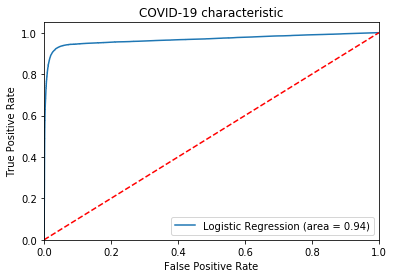

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('COVID-19 characteristic')
plt.legend(loc="lower right")
plt.show()

In [93]:
numeric_features_list = list(numeric_features)
eli5.explain_weights(pipe.named_steps['classifier'], top=30, feature_names=numeric_features_list)

Weight?,Feature
+1.446,CVASC_Cardiac_B
+0.825,ENDOC_MET_Diabetes
+0.788,CVASC_Other_Nos_B
+0.654,CVASC_Heart_Rhythm_A
+0.531,CHEST_Airway_Lungs_A
+0.516,<BIAS>
+0.408,Age_75_99
+0.398,CVASC_Cardiac_A
+0.394,ENDOC_MET_Metabolic_A
+0.387,CVASC_Other_Nos_A
